<a href="https://colab.research.google.com/github/Tdanso/Micro-Credential-Winter-22/blob/main/Copy_of_911_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/911.csv')

In [ ]:
df.head(20)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.shape

(99492, 9)

In [ ]:
columns_drop = ['e','timeStamp','desc']
df.drop(columns_drop, axis=1, inplace=True)


In [ ]:
df.head()

,lat,lng,zip,title,twp,addr
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


# Most common emergency

In [ ]:
df.groupby('title').describe()

lat             ...      zip         
                                        count       mean  ...      75%      max
title                                                     ...                  
EMS: ABDOMINAL PAINS                   1436.0  40.172037  ...  19446.0  19525.0
EMS: ACTIVE SHOOTER                       2.0  40.218105  ...  19363.0  19454.0
EMS: ALLERGIC REACTION                  438.0  40.159446  ...  19446.0  19525.0
EMS: ALTERED MENTAL STATUS             1386.0  40.170834  ...  19446.0  19525.0
EMS: AMPUTATION                          14.0  40.161081  ...  19462.5  19512.0
...                                       ...        ...  ...      ...      ...
Traffic: HAZARDOUS ROAD CONDITIONS -   1086.0  40.154376  ...  19446.0  19525.0
Traffic: ROAD OBSTRUCTION -            3144.0  40.151203  ...  19444.0  19525.0
Traffic: VEHICLE ACCIDENT -           23066.0  40.150463  ...  19444.0  19525.0
Traffic: VEHICLE FIRE -                 553.0  40.149842  ...  19446.0  19525.0
Traffic: VEHICLE LEAKING FUEL -          77.0  40.166523  ...  19454.0  19525.0

[110 rows x 24 columns]

# Data Visualization

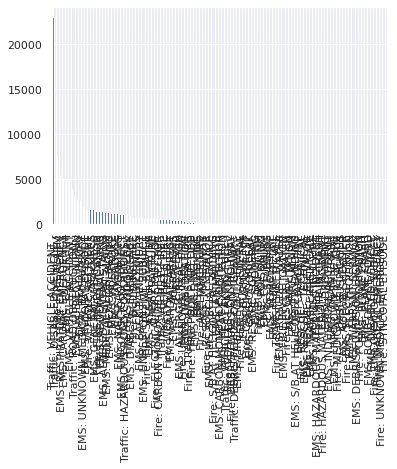

In [ ]:
df['title'].value_counts().plot.bar()

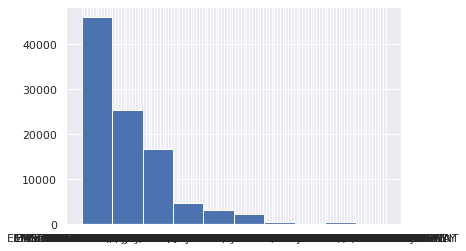

In [ ]:
df['title'].hist()

In [ ]:
df[['title', 'zip']].plot.bar(stacked=True)

In [ ]:
title_count = df.count('title')

In [ ]:
sns.barplot(x="title", y="twp", kind="box", data=df)